In [200]:
import numpy as np
import pylab as plt
from collections import Counter

## Intractable model by Tanaka et al. 2006 for spread of tuberculosis

![](img/transmission_process.png)

### model parameter
$\alpha$: rate with which each infectious host randomly infects other individuals from an unlimited supply of hosts

$\delta$: rate with which a host stops being infectious, either by recovering or dying

$\tau$: rate with which the pathogen of the host mutates randomly within the host, generating a novel haplotype under a single-locus infinite alleles model

$\theta = (\alpha, \delta, \tau)$

$y_{\theta} = (6,3,2,2,1,1,1,1,1,1,1)$: output, vector of clusters, that is different haplotypes. Each number represents the infectious hosts for this particular haplotype

### Observation
$\alpha = 0.2, \delta = 0, \tau = 0.198, m = 20$

assume, that $\delta, \tau$ are known and apply uniform prior

In [279]:
alpha = 0.2
delta = 0
tau = 0.198
m = 20
N = 2e7

def prior():
    return np.random.uniform(0.005,2)

def simulator(alpha, delta, tau):
    m = 20
    infected_hosts = np.array([[1]]) # list of haplotypes holding infectious hosts, we always start with one infected patient
    limit_exceeded = False
    round = 0
    
    while np.sum(infected_hosts) <= m and not limit_exceeded:
        round += 1
        # for each haplotype
        for cell in infected_hosts:
            # for each infectious host
            if cell[0] == 0:
                continue
            for host in range(cell[0]):
                # one of three things happen: transmission, mutation or recovery/death
                chance = np.random.rand()
                if chance < alpha:
                    if np.sum(infected_hosts) == m:
                        limit_exceeded = True
                        break
                    else:
                        cell += 1
                        
                chance = np.random.rand()
                if chance < delta:
                    cell -= 1
                    
                chance = np.random.rand()
                if chance < tau:
                    new_cell = [1]
                    cell -= 1
                    infected_hosts = np.vstack((infected_hosts, new_cell))
            
            if limit_exceeded:
                break
                
    return sorted(infected_hosts[infected_hosts != 0], reverse=True)

In [286]:
y0 = simulator(alpha,delta,tau)
y0

[3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [287]:
# determine posterior experimentally by exploring the whole space of possible alpha values
N = 10000
alphas = np.linspace(0.01,1,100)
posterior = []

for a in alphas:
    y = []
    for i in range(N):
        y.append(tuple(simulator(a,delta,tau)))
    y = Counter(y)
    posterior.append(y[tuple(y0)]/N)


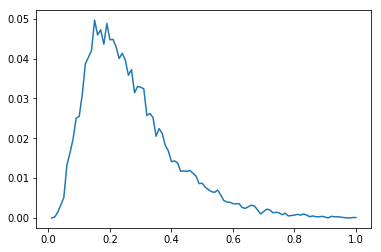

In [288]:
plt.plot(alphas, posterior)
plt.show()

In [289]:
thetas = []
samples = 0
for i in range(1000):
    while True:
        samples += 1
        theta = prior()
        y = simulator(theta, delta, tau)
        if y == y0:
            thetas.append(theta)
            break

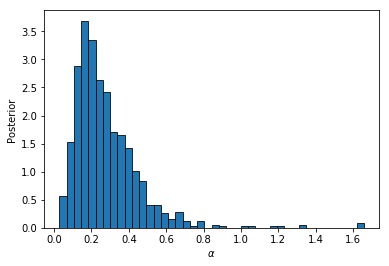

In [290]:
plt.hist(thetas, bins='auto', edgecolor='k', linewidth='0.8', normed=True)
plt.xlabel(r"$\alpha$")
plt.ylabel("Posterior")
plt.show()
